 #                    Payment Transactions Prediction.

## 1. Defining the Question

## a) Specifying the Question

 > Building a supervised machine learning algorithm to predict sales.

## b) Defining the Metrics for Success

> Building a machine learning algorithm with the lowest RMSE.

## c) Understanding the context



## d) Recording the Experimental Design

>Problem Definition

>Data Sourcing

>Check the Data

>Perform Data Cleaning

>Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

>Implement the Solution

>Challenge the Solution

>Follow up Questions

>Conclusions

>Recommendations

## e) Data Relevance

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in USD

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 2. Importing Libraries

In [143]:
from zipfile import ZipFile

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xg

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Data Wrangling
## a) Gathering Data

In [34]:
# Lets extract the csv file from a zipped file

file = 'supermarket_archive.zip'

with ZipFile(file,'r') as zip:
    print('Exctracting..0%....50%............100%')
    zip.extractall()
    print('Done!')

Exctracting..0%....50%............100%
Done!


In [35]:
# Create a funtion that reads data
def read(data):
    return pd.read_csv(data)

In [36]:
# Loading the csv file to a dataframe
supermarketdf = read('supermarket.csv')
supermarketdf.sample(5)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
539,358-88-9262,C,Member,Female,Food and beverages,87.48,6,26.2440,2/1/2019,18:43,Ewallet,524.88,4.761905,26.2440,5.1,551.1240
749,314-23-4520,C,Member,Male,Health and beauty,81.23,7,28.4305,1/15/2019,20:44,Cash,568.61,4.761905,28.4305,9.0,597.0405
83,787-56-0757,C,Member,Female,Food and beverages,80.36,4,16.0720,2/23/2019,18:45,Credit card,321.44,4.761905,16.0720,8.3,337.5120
827,760-53-9233,A,Member,Male,Fashion accessories,41.28,3,6.1920,3/26/2019,18:37,Credit card,123.84,4.761905,6.1920,8.5,130.0320
976,221-25-5073,A,Normal,Female,Food and beverages,74.66,4,14.9320,3/4/2019,10:39,Cash,298.64,4.761905,14.9320,8.5,313.5720


## b) Assessing Data

In [37]:
# Let's preview the shape of our dataset
print('The dataset has' , supermarketdf.shape, ' rows and columns respectively')

The dataset has (1000, 16)  rows and columns respectively


In [38]:
# Preview the columns of our dataset

supermarketdf.columns

Index(['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Total'],
      dtype='object')

In [39]:
supermarketdf.sample(2)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
543,243-47-2663,C,Member,Male,Electronic accessories,18.77,6,5.631,1/28/2019,16:43,Credit card,112.62,4.761905,5.631,5.5,118.251
342,873-95-4984,B,Member,Female,Health and beauty,76.90,7,26.915,2/15/2019,20:21,Cash,538.30,4.761905,26.915,7.7,565.215


In [40]:
# Check for the info of our datasets
supermarketdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax                      1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

1. Invoice ID has a wrong datatype (string instead of int).
2. Date and Time are objects are instead of datetime.
3. We need to strip off the white spaces.

In [41]:
# Lets check for misssing values
supermarketdf.isna().sum()

Invoice ID                 0
Branch                     0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax                        0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total                      0
dtype: int64

There were no missing values.

In [42]:
# Checking for duplicates
supermarketdf.duplicated().sum()

0

There were no duplicate values.

In [43]:
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset

def cardinal(data):
    print('Cardinality of the dataset columns : \n')
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

        
cardinal(supermarketdf)

Cardinality of the dataset columns : 

Invoice ID : 1000
Branch : 3
Customer type : 2
Gender : 2
Product line : 6
Unit price : 943
Quantity : 10
Tax : 990
Date : 89
Time : 506
Payment : 3
cogs : 990
gross margin percentage : 1
gross income : 990
Rating : 61
Total : 990


We can decide to drop the column gross margin percentage since the whole dataset has one value.

According to an article by [investopedia](#https://www.investopedia.com/terms/g/grossmargin.asp) The gross margin (also referred to as gross profit) represents each dollar of revenue that the company retains after subtracting COGS.

 This means carrefour company's gross profit margin is 4.761905%.

In [44]:
# categorical = ['Branch','Customer type','Gender','Product line','Payment']

print('BRANCH')
print(supermarketdf['Branch'].unique())
print('----------------------------------------------------')
print('CUSTOMER TYPE')
print(supermarketdf['Customer type'].unique())
print('----------------------------------------------------')
print('GENDER')
print(supermarketdf['Gender'].unique())
print('----------------------------------------------------')
print('PRODUCT LINE')
print(supermarketdf['Product line'].unique())
print('----------------------------------------------------')
print('PAYMENT')
print(supermarketdf['Payment'].unique())

BRANCH
['A' 'C' 'B']
----------------------------------------------------
CUSTOMER TYPE
['Member' 'Normal']
----------------------------------------------------
GENDER
['Female' 'Male']
----------------------------------------------------
PRODUCT LINE
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
----------------------------------------------------
PAYMENT
['Ewallet' 'Cash' 'Credit card']


In [45]:
df1 = read('supermarket_sales.csv')
df1.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
183,824-88-3614,C,Naypyitaw,Normal,Male,Health and beauty,34.31,8,13.7240,288.2040,1/25/2019,15:00,Ewallet,274.48,4.761905,13.7240,5.7
790,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,3/3/2019,20:06,Credit card,46.41,4.761905,2.3205,4.0
684,510-79-0415,B,Mandalay,Member,Female,Sports and travel,23.08,6,6.9240,145.4040,1/24/2019,19:20,Ewallet,138.48,4.761905,6.9240,4.9


In [46]:
df1.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [47]:
# Lets check the summary statistics of our data

supermarketdf.describe()

,Unit price,Quantity,Tax,cogs,gross margin percentage,gross income,Rating,Total
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,307.58738,4.761905e+00,15.379369,6.97270,322.966749
std,26.494628,2.923431,11.708825,234.17651,6.131498e-14,11.708825,1.71858,245.885335
min,10.080000,1.000000,0.508500,10.17000,4.761905e+00,0.508500,4.00000,10.678500
25%,32.875000,3.000000,5.924875,118.49750,4.761905e+00,5.924875,5.50000,124.422375
50%,55.230000,5.000000,12.088000,241.76000,4.761905e+00,12.088000,7.00000,253.848000
75%,77.935000,8.000000,22.445250,448.90500,4.761905e+00,22.445250,8.50000,471.350250
max,99.960000,10.000000,49.650000,993.00000,4.761905e+00,49.650000,10.00000,1042.650000


In [48]:
# Check or the ``````````AttributeError
supermarketdf.dtypes

Invoice ID                  object
Branch                      object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax                        float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Total                      float64
dtype: object

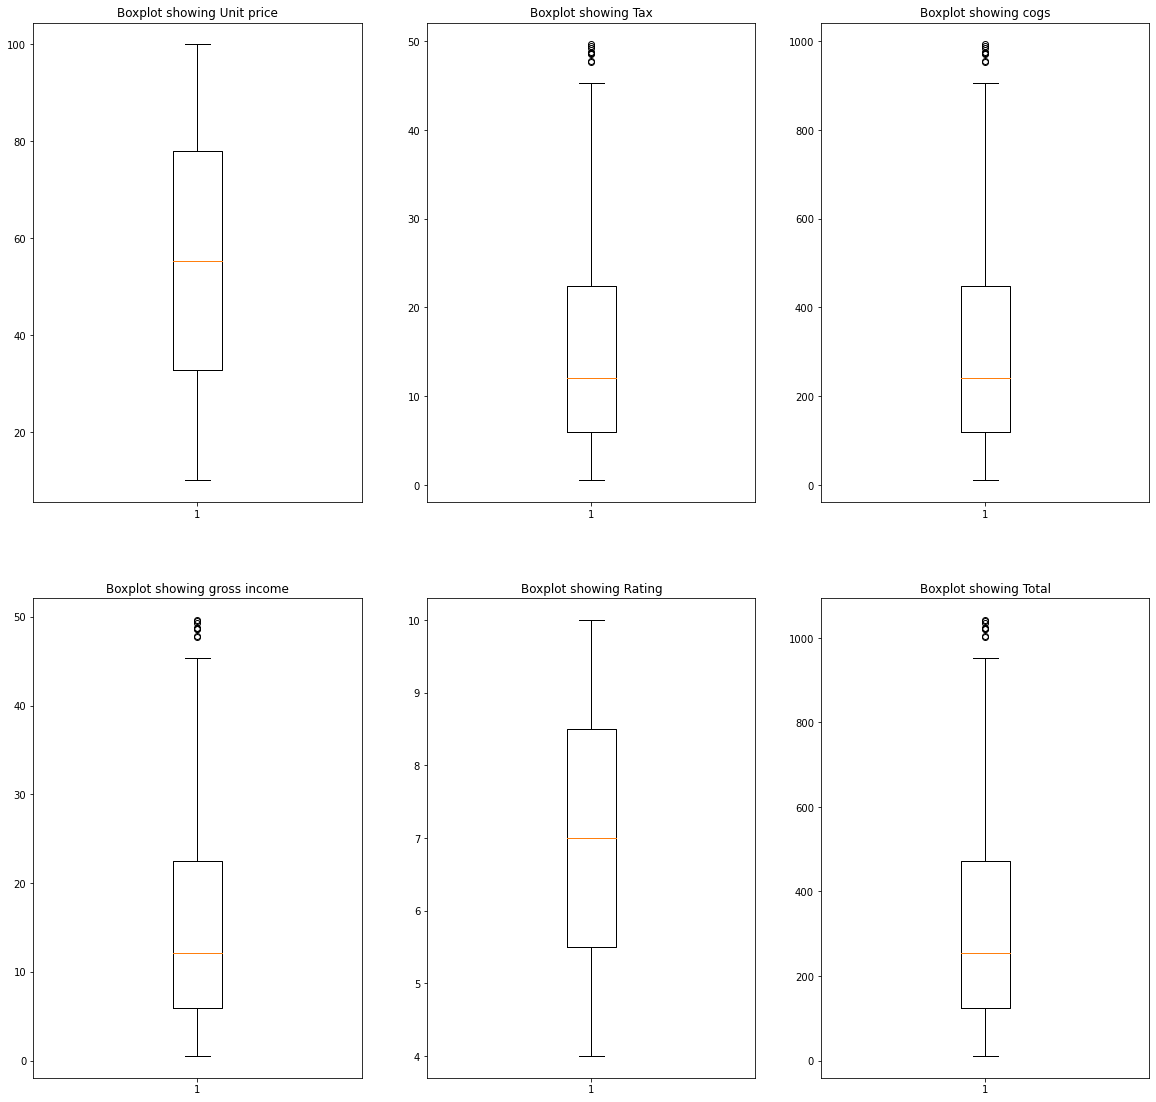

In [49]:
# checking for outliers
# define a function that plots boxplots to visualize outliers

def outliers ():
    "making a dictionary for numerical columns"
    columns_dict = {'Unit price': 1, 'Tax': 2, 'cogs': 3, 'gross income': 4, 'Rating': 5, 'Total': 6}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(3,3,i);
      plt.boxplot(supermarketdf[variable]);
      plt.title(f"Boxplot showing {variable}");
    plt.show()
outliers()

(a) Some columns have outliers.

(b) We need to assess the outliers.

In [50]:
# Lets visualize the outliers in the Tax column

supermarketdf.query('Tax > 45')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


In [51]:
# Lets visualize the outliers in the cogs column
supermarketdf.query('cogs > 900')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


In [52]:
# Lets visualize the outliers in the Totals column

supermarketdf.query('Total > 950')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


Outliers shall be retained as they contain pertinent and real information.

## c) Cleaning

Lets correct the following :
1. Invoice ID has a wrong datatype (string instead of int).
2. Date and Time are objects are instead of datetime.
3. We need to strip off the white spaces and lower the cases of columns for easier computation.
4. Drop the gross_margin_percentage column, inplace = True.. :-D

In [53]:
# Make a copy of the dataframe
# Lets save the dataframe to a csv file 
cleandf = supermarketdf.copy()

# Issue 1 :

1. Lets strip white spaces from the column names and for the row invoice ID for :

    (i) Consistency
    
    (ii) Easier and faster computation.



### Code

In [54]:
# Lets use the lambda funtion to strip off white spaces

cleandf.rename(columns = lambda x : x.strip().lower().replace(" ","_"),inplace =True)

### Test

In [55]:
# Lets preview the columns

cleandf.columns

Index(['invoice_id', 'branch', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax', 'date', 'time', 'payment', 'cogs',
       'gross_margin_percentage', 'gross_income', 'rating', 'total'],
      dtype='object')

In [56]:
cleandf.dtypes

invoice_id                  object
branch                      object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax                        float64
date                        object
time                        object
payment                     object
cogs                       float64
gross_margin_percentage    float64
gross_income               float64
rating                     float64
total                      float64
dtype: object

# Issue 2 :
(i)The columns date and time have incorect datatypes ie object instead of datetime.

(ii)Sort the dates so as to identify the trends.

(iii) Split time to hours and minutes, Split date to years, months and days.

## Code

#### Splitting of the dataset

In [57]:
# Lets split the time to hours and minutes. This is required for the machine to learn trends easier.

cleandf['hour'] = cleandf['time'].apply(lambda x :x.split(':')[0])
cleandf['min'] = cleandf['time'].apply(lambda x :x.split(':')[1])


In [58]:
# Lets split the date to years,months and days. This is required for the machine to learn trends easier.

cleandf['day'] = cleandf['date'].apply(lambda x :x.split('/')[0])
cleandf['month'] = cleandf['date'].apply(lambda x :x.split('/')[1])
cleandf['year'] = cleandf['date'].apply(lambda x :x.split('/')[2])

#### Inspecting the data types

In [59]:
# Lets change the datatype of the date column to datetime.

cleandf['date'] = pd.to_datetime(cleandf['date'])

In [60]:
# lets change hours,minutes, year, month and day to integers

cleandf[['hour','min','year','month','day']] = cleandf[['hour','min','year','month','day']].astype('int64')

#### Test

In [61]:
# Check for the datatypes
cleandf.dtypes

invoice_id                         object
branch                             object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax                               float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
total                             float64
hour                                int64
min                                 int64
day                                 int64
month                               int64
year                                int64
dtype: object

#### Sorting the dates

In [62]:
# Sorting date and time from the 'oldest' transaction to the most recent one
cleandf = cleandf.sort_values(by = ['date','time'])   

In [63]:
# Lets display the first five rows to display the order
cleandf.head()

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,...,cogs,gross_margin_percentage,gross_income,rating,total,hour,min,day,month,year
17,765-26-6951,A,Normal,Male,Sports and travel,72.61,6,21.783,2019-01-01,10:39,...,435.66,4.761905,21.783,6.9,457.443,10,39,1,1,2019
970,746-04-1077,B,Member,Female,Food and beverages,84.63,10,42.315,2019-01-01,11:36,...,846.30,4.761905,42.315,9.0,888.615,11,36,1,1,2019
839,271-77-8740,C,Member,Female,Sports and travel,29.22,6,8.766,2019-01-01,11:40,...,175.32,4.761905,8.766,5.0,184.086,11,40,1,1,2019
523,133-14-7229,C,Normal,Male,Health and beauty,62.87,2,6.287,2019-01-01,11:43,...,125.74,4.761905,6.287,5.0,132.027,11,43,1,1,2019
567,651-88-7328,A,Normal,Female,Fashion accessories,65.74,9,29.583,2019-01-01,13:55,...,591.66,4.761905,29.583,7.7,621.243,13,55,1,1,2019


# Issue 3

In [64]:
cleandf['invoice_id'].replace('-','')

17     765-26-6951
970    746-04-1077
839    271-77-8740
523    133-14-7229
567    651-88-7328
          ...     
671    642-61-4706
474    676-39-6028
473    731-59-7531
643    131-15-8856
963    364-34-2972
Name: invoice_id, Length: 1000, dtype: object

In [65]:
cleandf.sample(2)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,...,cogs,gross_margin_percentage,gross_income,rating,total,hour,min,day,month,year
526,286-62-6248,B,Normal,Male,Fashion accessories,39.21,4,7.842,2019-01-16,20:03,...,156.84,4.761905,7.842,9.0,164.682,20,3,1,16,2019
801,324-41-6833,C,Member,Female,Electronic accessories,30.20,8,12.080,2019-03-03,19:30,...,241.60,4.761905,12.080,5.1,253.680,19,30,3,3,2019


# Issue 4 
Drop the gross margin percentage permanently from our data

## Code

In [66]:
cleandf.drop(columns = 'gross_margin_percentage',inplace = True)

In [90]:
cleandf.drop(columns = 'invoice_id',inplace = True)

## Test

In [67]:
cleandf.sample(2)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,hour,min,day,month,year
87,633-44-8566,A,Member,Male,Food and beverages,49.38,7,17.283,2019-03-27,20:35,Credit card,345.66,17.283,7.3,362.943,20,35,3,27,2019
390,541-89-9860,C,Member,Female,Fashion accessories,80.48,3,12.072,2019-02-15,12:31,Cash,241.44,12.072,8.1,253.512,12,31,2,15,2019


In [68]:
# Lets save the dataframe to a csv file 
cleandf.to_csv('clean_df.csv',index=False)

In [69]:
cleandf.head()

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,hour,min,day,month,year
17,765-26-6951,A,Normal,Male,Sports and travel,72.61,6,21.783,2019-01-01,10:39,Credit card,435.66,21.783,6.9,457.443,10,39,1,1,2019
970,746-04-1077,B,Member,Female,Food and beverages,84.63,10,42.315,2019-01-01,11:36,Credit card,846.30,42.315,9.0,888.615,11,36,1,1,2019
839,271-77-8740,C,Member,Female,Sports and travel,29.22,6,8.766,2019-01-01,11:40,Ewallet,175.32,8.766,5.0,184.086,11,40,1,1,2019
523,133-14-7229,C,Normal,Male,Health and beauty,62.87,2,6.287,2019-01-01,11:43,Cash,125.74,6.287,5.0,132.027,11,43,1,1,2019
567,651-88-7328,A,Normal,Female,Fashion accessories,65.74,9,29.583,2019-01-01,13:55,Cash,591.66,29.583,7.7,621.243,13,55,1,1,2019


# 4. Exploratory Data Analysis

## (a) Univariate Analysis

<Figure size 1000x300 with 0 Axes>

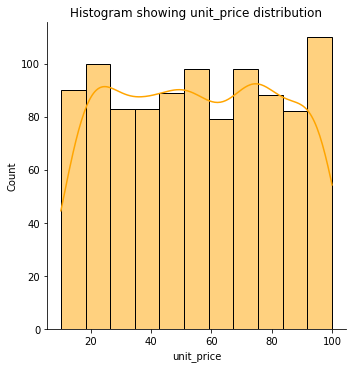

<Figure size 1000x300 with 0 Axes>

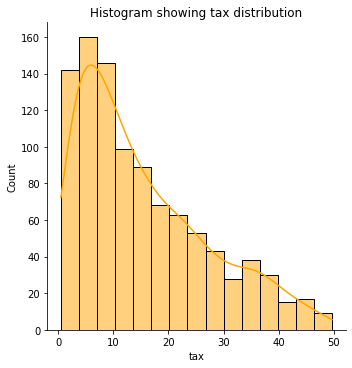

<Figure size 1000x300 with 0 Axes>

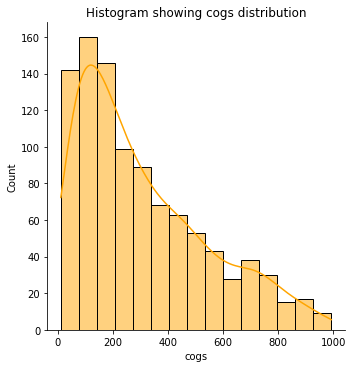

<Figure size 1000x300 with 0 Axes>

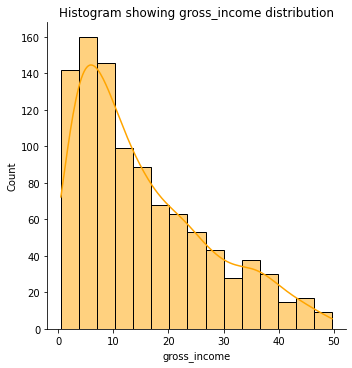

<Figure size 1000x300 with 0 Axes>

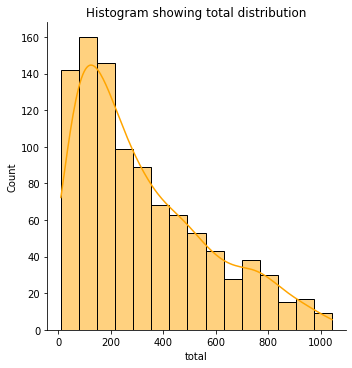

In [70]:
#Plotting histrograms for categorical values
# columns_dict = ['unit_price','tax','cogs','gross_income','total']

def histogram (v):
    columns_dict = ['unit_price','tax','cogs','gross_income','total']
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'orange')
      plt.title(f"Histogram showing {i} distribution", color = 'Black')
      plt.show()

histogram (cleandf);

In [71]:
cleandf.sample(3)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,hour,min,day,month,year
89,318-68-5053,B,Normal,Female,Health and beauty,76.99,6,23.0970,2019-02-27,17:55,Cash,461.94,23.0970,6.1,485.0370,17,55,2,27,2019
974,744-82-9138,C,Normal,Male,Fashion accessories,86.13,2,8.6130,2019-02-07,17:59,Cash,172.26,8.6130,8.2,180.8730,17,59,2,7,2019
860,848-95-6252,C,Member,Female,Home and lifestyle,86.27,1,4.3135,2019-02-20,13:24,Ewallet,86.27,4.3135,7.0,90.5835,13,24,2,20,2019


In [72]:
cleandf['time'].value_counts()

14:42    7
19:48    7
17:38    6
17:16    5
19:39    5
        ..
14:27    1
18:48    1
10:58    1
13:03    1
14:58    1
Name: time, Length: 506, dtype: int64

In [73]:
# 
cleandf[['product_line','total']].groupby('product_line').sum('total')

,total
product_line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [74]:
# 
cleandf[['product_line','tax']].groupby('product_line').sum('total')

,tax
product_line,
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Food and beverages,2673.5640
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Sports and travel,2624.8965


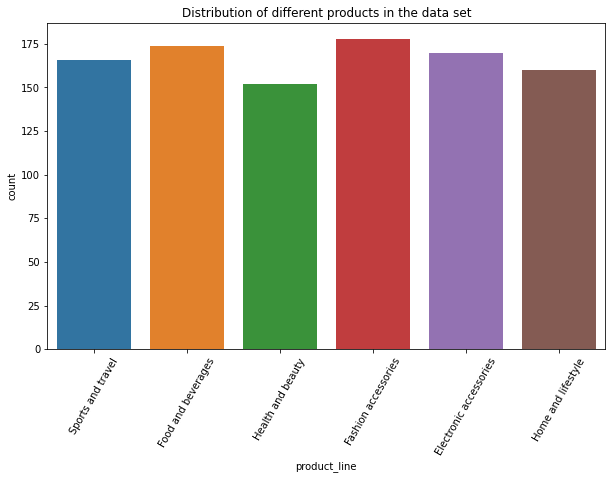

In [75]:
# Lets plot the distribution of patients by age groups
plt.figure(figsize=(10,6))
sns.countplot(x=cleandf['product_line'])
plt.xticks(rotation=60);
plt.title('Distribution of different products in the data set');

# code to arrange them in descending order

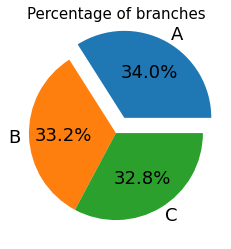

In [76]:
branch_count = cleandf['branch'].value_counts()

plt.pie(branch_count,labels=["A", "B","C"], autopct='%1.1f%%', textprops={'fontsize': 18},
        explode = (0.2, 0,0))

plt.rcParams['font.size'] = 12
plt.title("Percentage of branches",fontsize=15)
# plt.legend(loc ='right')
plt.show()

Branch A had slightly higher sales than other branches

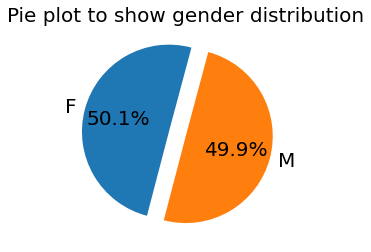

In [77]:
gender_count =cleandf.gender.value_counts()

plt.pie(gender_count,labels = ['F','M'],autopct = '%1.1f%%',textprops ={'fontsize' : 20},
       explode = (0.2,0),startangle = 75)
plt.rcParams['font.size'] = 14
plt.title('Pie plot to show gender distribution',fontsize = 20)
plt.show()

In [78]:
gender_count

Female    501
Male      499
Name: gender, dtype: int64

The gender distribution is almost equal.

In [79]:
product_count = cleandf.product_line.value_counts()
product_count

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

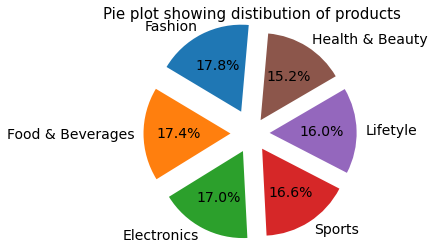

In [80]:
plt.pie(product_count,labels = ['Fashion','Food & Beverages','Electronics','Sports','Lifetyle','Health & Beauty'],
       explode = (0.28,0.25,0.23,0.21,0.2,0.18),startangle=85,autopct ='%1.1f%%')
plt.rcParams['font.size'] = 14
plt.title('Pie plot showing distibution of products',fontsize = 15);

In [81]:
payment_count =cleandf.payment.value_counts()
payment_count

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

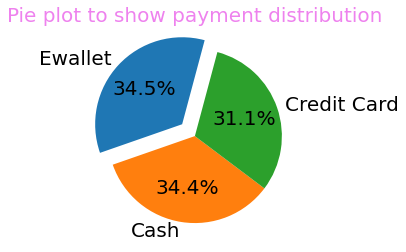

In [82]:
payment_count =cleandf.payment.value_counts()

plt.pie(payment_count,labels = ['Ewallet','Cash','Credit Card'],autopct = '%1.1f%%',textprops ={'fontsize' : 20},
       explode = (0.2,0,0),startangle = 75)
plt.rcParams['font.size'] = 14
plt.title('Pie plot to show payment distribution',fontsize = 20,color ='violet')
plt.show()

# (b) Bivariate Analysis

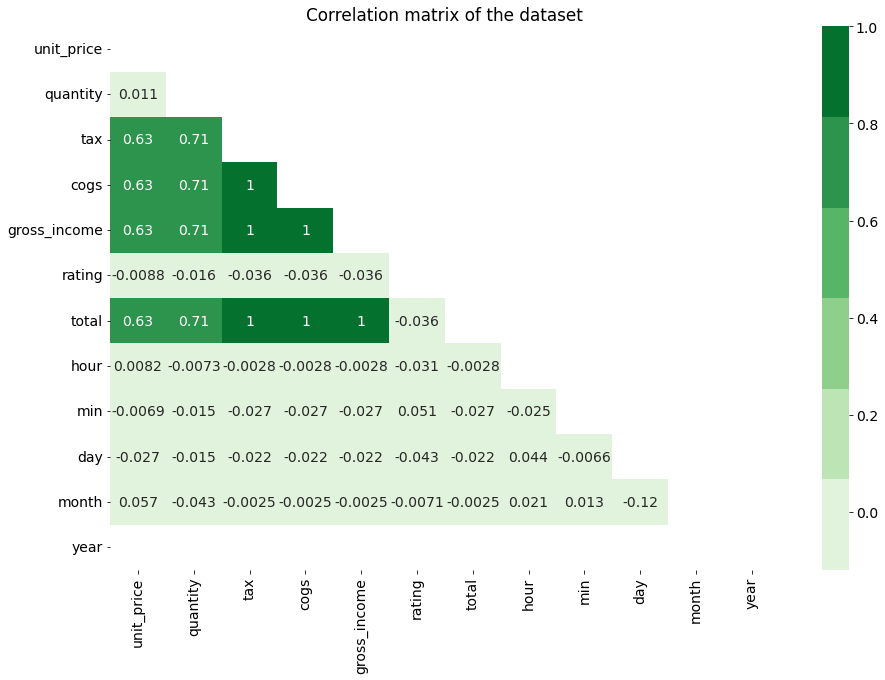

In [83]:
## Plotting a correlation matrix

def Cormatrix (h):
      plt.subplots(figsize=(15,10))
      mask = np.triu(np.ones_like(h.corr()))
      colormap = sns.color_palette("Greens")
      dataplot = sns.heatmap(h.corr(), cmap=colormap, annot=True, mask=mask)
      dataplot.set_title("Correlation matrix of the dataset")
      plt.show()

Cormatrix (cleandf)

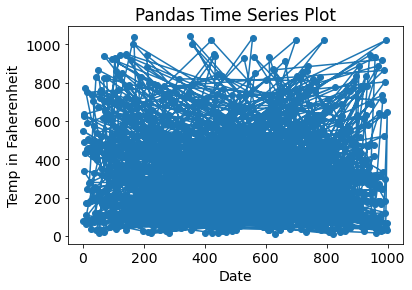

In [84]:
# Import Library

import matplotlib.pyplot as plt

# Plot

plt.plot(cleandf["total"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Temp in Faherenheit")
plt.title("Pandas Time Series Plot")

# Display

plt.show()

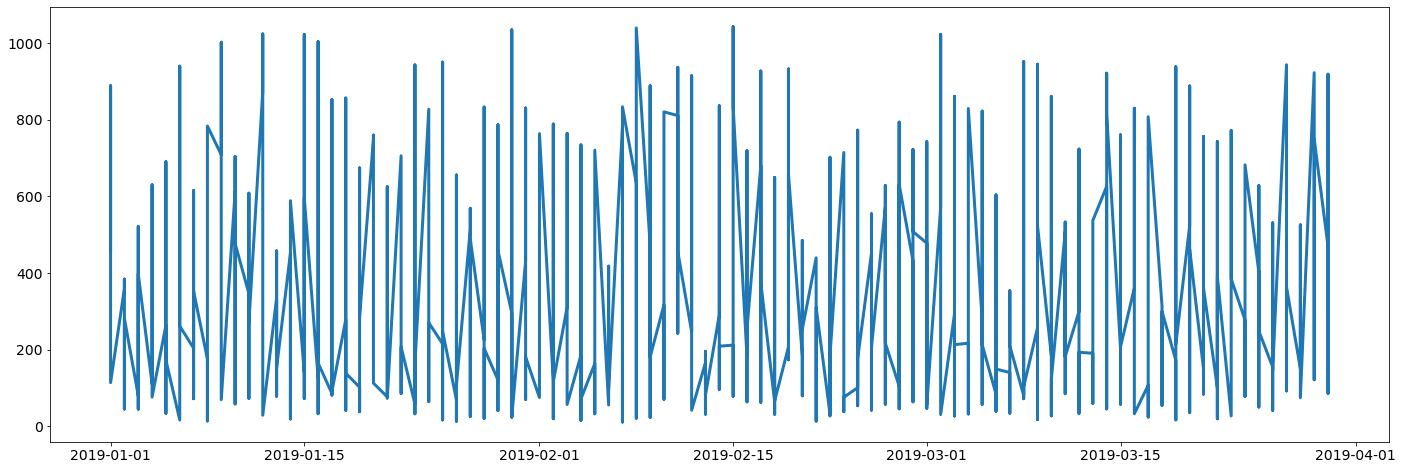

In [85]:
fig = plt.figure(figsize=(24, 8))
plt.plot(cleandf.date, cleandf.total, label='blogs_read', 
         linewidth=3);

# (c) Multivariate Analysis

In [86]:
cleandf.sample(2)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,hour,min,day,month,year
581,443-82-0585,A,Member,Female,Health and beauty,77.68,4,15.536,2019-02-01,19:54,Cash,310.72,15.536,8.4,326.256,19,54,2,1,2019
453,568-88-3448,A,Normal,Male,Health and beauty,25.00,1,1.250,2019-03-03,15:09,Ewallet,25.00,1.250,5.5,26.250,15,9,3,3,2019


In [87]:
cleandf.dtypes

invoice_id               object
branch                   object
customer_type            object
gender                   object
product_line             object
unit_price              float64
quantity                  int64
tax                     float64
date             datetime64[ns]
time                     object
payment                  object
cogs                    float64
gross_income            float64
rating                  float64
total                   float64
hour                      int64
min                       int64
day                       int64
month                     int64
year                      int64
dtype: object

## Feature Engineering

### Label Encoding

In [92]:
# Lets label encode
# Make a copy of the df
cleandf_01 = cleandf.copy()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

objects = [col for col in cleandf.columns if cleandf[col].dtype == 'object']
objects

[]

In [93]:
for col in objects :
    cleandf[col] = le.fit_transform(cleandf[col])

In [94]:
cleandf.sample(3)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,hour,min,day,month,year
824,1,0,0,5,60.08,7,21.028,2019-02-14,76,1,420.56,21.028,4.5,441.588,11,36,2,14,2019
148,1,0,1,4,71.86,8,28.744,2019-03-06,237,1,574.88,28.744,6.2,603.624,15,7,3,6,2019
132,1,1,0,5,34.84,4,6.968,2019-02-10,397,0,139.36,6.968,7.4,146.328,18,36,2,10,2019


## Generating cyclical time features


In [95]:
# Lets convert hours to cos and sin
# This will help the machine learn easier since our time is in 24 hrs. 
# This is because theres no way youll convince the machine 0 hrs comes immediately after 23hrs

def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(cleandf['hour']-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(cleandf['hour']-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

cleandf = generate_cyclical_features(cleandf, 'hour', 24, 0)



In [97]:
cleandf.head()

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cogs,gross_income,rating,total,min,day,month,year,sin_hour,cos_hour
17,0,1,1,5,72.61,6,21.783,2019-01-01,31,1,435.66,21.783,6.9,457.443,39,1,1,2019,0.500000,-0.866025
970,1,0,0,2,84.63,10,42.315,2019-01-01,76,1,846.30,42.315,9.0,888.615,36,1,1,2019,0.258819,-0.965926
839,2,0,0,5,29.22,6,8.766,2019-01-01,79,2,175.32,8.766,5.0,184.086,40,1,1,2019,0.258819,-0.965926
523,2,1,1,3,62.87,2,6.287,2019-01-01,81,0,125.74,6.287,5.0,132.027,43,1,1,2019,0.258819,-0.965926
567,0,1,0,1,65.74,9,29.583,2019-01-01,183,0,591.66,29.583,7.7,621.243,55,1,1,2019,-0.258819,-0.965926


## Principal Component Analysis

In [98]:
cleandf_01.to_csv('cleaned.csv',index = False)

In [100]:
cleandf.columns

Index(['branch', 'customer_type', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax', 'date', 'time', 'payment', 'cogs', 'gross_income',
       'rating', 'total', 'min', 'day', 'month', 'year', 'sin_hour',
       'cos_hour'],
      dtype='object')

In [101]:
# Preprocessing data

X = cleandf_01.drop(['total','date','time'],1)
y = cleandf_01['total']

In [102]:
# Splitting into train and test data


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [103]:
# Normalization of the data as the machine could learn better

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
# Applying PCA


pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [105]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.63309639e-01, 7.87022167e-02, 7.59150581e-02, 7.41911498e-02,
       7.15690087e-02, 6.93108563e-02, 6.55603187e-02, 6.38561696e-02,
       6.12370288e-02, 6.02154286e-02, 5.71357820e-02, 5.32881450e-02,
       5.70919871e-03, 3.56785929e-33, 6.20744198e-34, 0.00000000e+00])

In [298]:
cleandf.columns

Index(['branch', 'customer_type', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax', 'date', 'time', 'payment', 'cogs', 'gross_income',
       'rating', 'total', 'min', 'year', 'month', 'day', 'sin_hour',
       'cos_hour'],
      dtype='object')

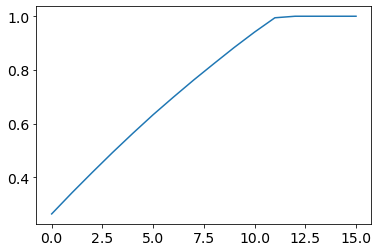

In [106]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [108]:
# Fitting the random classifier in the 11 Principal Components
classifier = RandomForestRegressor(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [109]:
# Evaluating the model

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

# Evaluating the model using RMSE Evaluation Metric
print('RSME is : ',root_mean_squared_error(y_test, y_pred))

print('MSE is : ', mean_squared_error(y_test,y_pred))

RSME is :  55.541401316045985
MSE is :  3084.847260150075


# Implementing the Solution

# XG Boost

In [155]:
# Linear regression
X = cleandf_01.drop(['total','date','time'],1)
y = cleandf_01['total']

In [156]:
# Crafting of the dataset into features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False) # We set shuffle to false since it is a time series data which follows some sequence 

In [157]:
# Naive model
# model without hyperparameters
from sklearn.linear_model import LinearRegression


xgb_r = xg.XGBRegressor()
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

In [158]:
# Create a dataframe to compare the actual values with the predicted ones
comparision_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparision_df

,Actual,Predicted
803,462.672,456.301727
589,76.755,78.203949
692,510.615,500.857605
283,628.929,620.259338
966,314.685,312.438141
...,...,...
671,196.140,194.035019
474,338.310,338.408234
473,609.588,600.440979
643,609.168,599.804260


In [159]:
# Check for the summary statistics of the data
comparision_df.describe()

,Actual,Predicted
count,300.000000,300.000000
mean,315.956515,315.595734
std,240.994547,241.210678
min,16.275000,15.911073
25%,126.824250,126.348324
50%,234.218250,232.626427
75%,461.377875,456.220612
max,951.825000,962.967773


In [160]:
# Evaluation of the model
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.055032441991168
Mean Squared Error: 26.278897769872408
Root Mean Squared Error: 5.1262947408310815


In [161]:
# Use some external dataset to see how the model performs
test_data =read("milk.csv")
test_data.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


## Hyperparameter tuned model.

In [150]:
from sklearn.linear_model import LinearRegression


xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

[02:07:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [151]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
803,462.672,441.052673
589,76.755,75.374405
692,510.615,482.477539
283,628.929,610.347168
966,314.685,302.855469
...,...,...
671,196.140,189.207291
474,338.310,329.392578
473,609.588,579.570862
643,609.168,579.570862


In [152]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  14.049280


In [153]:
df.describe()

,Actual,Predicted
count,300.000000,300.000000
mean,315.956515,305.860840
std,240.994547,233.427841
min,16.275000,15.852458
25%,126.824250,122.511024
50%,234.218250,222.222946
75%,461.377875,441.052673
max,951.825000,930.425293


In [154]:

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.19862908528646
Mean Squared Error: 197.3822786142408
Root Mean Squared Error: 14.049280359301


Mean Absolute Error: 9.38660899269104
Mean Squared Error: 166.67301657587632
Root Mean Squared Error: 12.910190415941832


# Challenging the solution

## Random Forest Regressor

In [122]:
X = cleandf_01.drop(['total','date','time'],1)
y = cleandf_01['total']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)


,Actual,Predicted
158,918.729,923.811840
805,325.374,326.024370
512,398.958,398.356875
137,216.846,216.898185
842,82.887,83.532225


In [125]:
comparison_frame.describe()

,Actual,Predicted
count,200.000000,200.000000
mean,321.718635,321.718034
std,236.562047,236.534132
min,13.167000,13.387290
25%,144.553500,144.898530
50%,255.144750,254.969243
75%,461.296500,461.327869
max,1022.385000,1019.292750


There is overfitting.

Hyperameter tuning

In [126]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8027622750000394
Mean Squared Error: 2.157881070941013
Root Mean Squared Error: 1.468972794486342


In [127]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)


,Actual,Predicted
158,918.729,946.371709
805,325.374,323.966385
512,398.958,400.480734
137,216.846,213.565079
842,82.887,80.245082


In [128]:
comparison_frame.describe()

,Actual,Predicted
count,200.000000,200.000000
mean,321.718635,322.358988
std,236.562047,237.315459
min,13.167000,25.965953
25%,144.553500,146.748414
50%,255.144750,256.733567
75%,461.296500,460.034027
max,1022.385000,980.095428


In [129]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.6337216683283553
Mean Squared Error: 36.42094660280336
Root Mean Squared Error: 6.034976934736649


# RNN model

In [134]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True,go_backwards=False, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='sigmoid', return_sequences=True))
regressor.add(Dropout(0.2))



#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
13/13 [==============================] - 10s 19ms/step - loss: 164797.0469
Epoch 2/100
13/13 [==============================] - 0s 20ms/step - loss: 162573.0156
Epoch 3/100
13/13 [==============================] - 0s 22ms/step - loss: 161187.1719
Epoch 4/100
13/13 [==============================] - 0s 20ms/step - loss: 160189.5156
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 159498.6250
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 158932.5781
Epoch 7/100
13/13 [==============================] - 0s 19ms/step - loss: 158428.9062
Epoch 8/100
13/13 [==============================] - 0s 19ms/step - loss: 157908.3750
Epoch 9/100
13/13 [==============================] - 0s 19ms/step - loss: 157447.5781
Epoch 10/100
13/13 [==============================] - 0s 19ms/step - loss: 156965.7969
Epoch 11/100
13/13 [==============================] - 0s 20ms/step - loss: 156551.2344
Epoch 12/100
13/13 [==============================]

13/13 [==============================] - 0s 17ms/step - loss: 126056.0312
Epoch 96/100
13/13 [==============================] - 0s 16ms/step - loss: 125889.9375
Epoch 97/100
13/13 [==============================] - 0s 16ms/step - loss: 125591.7969
Epoch 98/100
13/13 [==============================] - 0s 17ms/step - loss: 125019.2031
Epoch 99/100
13/13 [==============================] - 0s 16ms/step - loss: 124828.1719
Epoch 100/100
13/13 [==============================] - 0s 17ms/step - loss: 124692.2266


In [135]:
y_pred = regressor.predict(X_test)
y_pred

7/7 [==============================] - 1s 4ms/step


array([[72.4392  ],
       [72.43927 ],
       [72.43927 ],
       [72.43927 ],
       [72.43923 ],
       [72.43922 ],
       [72.43926 ],
       [72.43925 ],
       [72.43922 ],
       [72.43925 ],
       [72.43926 ],
       [72.439255],
       [72.439224],
       [72.437096],
       [26.281599],
       [72.43924 ],
       [72.43927 ],
       [72.43926 ],
       [72.439255],
       [72.43926 ],
       [72.439255],
       [72.43926 ],
       [72.439156],
       [72.43923 ],
       [72.43927 ],
       [72.43911 ],
       [72.439224],
       [72.43925 ],
       [72.43925 ],
       [72.43902 ],
       [72.43924 ],
       [72.439255],
       [72.43926 ],
       [72.439255],
       [72.439125],
       [72.439186],
       [72.43926 ],
       [72.43913 ],
       [72.439255],
       [72.43837 ],
       [72.43926 ],
       [72.43927 ],
       [72.43855 ],
       [72.43921 ],
       [72.43927 ],
       [72.43916 ],
       [72.43927 ],
       [72.439255],
       [72.439255],
       [72.43927 ],


In [136]:
y_test.shape

(200,)

In [137]:
y_pred.shape

(200, 1)

In [138]:
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
comparisondf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [139]:
comparisondf.head()

,Actual,Predicted
0,918.729,72.439201
1,325.374,72.439270
2,398.958,72.439270
3,216.846,72.439270
4,82.887,72.439232


In [140]:
comparisondf.describe()

,Actual,Predicted
count,200.000000,200.000000
mean,321.718635,70.408287
std,236.562047,8.715631
min,13.167000,25.831942
25%,144.553500,72.439217
50%,255.144750,72.439255
75%,461.296500,72.439262
max,1022.385000,72.439278


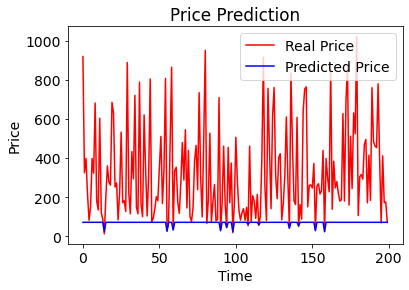

In [141]:
plt.plot(y_test, color='red', label='Real Price')
plt.plot(y_pred, color='blue', label='Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [97]:
test_data =pd.read_csv("milk.csv")
test_data.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [98]:
test_data.shape

(168, 2)

In [99]:
milk_test = test_data['Milk Production']

In [100]:
y_predict = regressor.predict(milk_test)
y_predict

6/6 [==============================] - 1s 3ms/step


array([[248.6091 ],
       [249.09984],
       [247.80727],
       [247.57784],
       [246.66948],
       [247.03271],
       [247.80727],
       [248.4429 ],
       [248.97351],
       [248.81471],
       [249.24725],
       [248.72818],
       [248.42651],
       [249.00935],
       [247.62012],
       [247.34462],
       [246.4982 ],
       [246.79938],
       [247.52199],
       [248.15504],
       [248.71104],
       [248.64288],
       [249.02734],
       [248.45932],
       [247.98602],
       [248.13947],
       [247.14735],
       [246.93307],
       [246.19553],
       [246.56592],
       [247.27798],
       [247.82196],
       [248.36151],
       [248.24944],
       [248.52544],
       [247.8959 ],
       [247.54985],
       [248.07759],
       [246.88402],
       [246.72806],
       [246.07225],
       [246.34416],
       [246.97017],
       [247.62012],
       [248.18634],
       [248.093  ],
       [248.39395],
       [247.88107],
       [247.2912 ],
       [247.88107],


In [104]:
milk_test = np.array(list(milk_test))
y_predict = np.array(y_predict)
comparisondf_1 = pd.DataFrame({'Actual': milk_test.flatten(), 'Predicted': y_predict.flatten()})

In [105]:
comparisondf_1.head()

,Actual,Predicted
0,589.0,248.609100
1,561.0,249.099838
2,640.0,247.807266
3,656.0,247.577835
4,727.0,246.669479


In [107]:
comparisondf_1.describe()

,Actual,Predicted
count,168.000000,168.000000
mean,754.708333,246.504517
std,102.204524,1.151663
min,553.000000,244.554245
25%,677.750000,245.664291
50%,761.000000,246.290489
75%,824.500000,247.281288
max,969.000000,249.247253


# Follow up Questions

# Conclusion

1. Store A has the highest number of sales 
2. Gender is almost equal in proportion
3. Many people pay via ewallet
4. Most of the numerical variables are not normally distributed.
5. Correlation
6. ML prediction with an accuracy of.
